In [1]:
import sys
sys.path.append('./util/')
import numpy as np
import matplotlib.pyplot as plt

from util.Grapher import Grapher
from util.ImageGenerator import ImageGenerator
from scipy import ndimage



In [2]:
img_gen = ImageGenerator(1000,1000,100)

# Most basic, easiest image with 64 solid well separated cells
_, centers_1 = img_gen.make_ellipsoidal_image(
    25,
    25,
    10,
    200,
    200,
    10,
    fname = "solid_64_cell_25_rad_1",
)


36 cells will be drawn on a 1000 (x) by 1000 (y) by 100 (z) image
Saved tif as:  solid_64_cell_25_rad_1.tif  at  solid_64_cell_25_rad_1.tif


TypeError: 'NoneType' object is not iterable

In [13]:
img = np.zeros((200,200, 10))
for i in range(50, 150):
    for j in range(50, 150):
        img[i, j] = 255
blurred_img = ndimage.filters.gaussian_filter(img, sigma=5)

In [24]:
x = np.array([[1],[2],[1]])
y = np.zeros((3,3))
z = np.dot(y, x)
print(z)

[[ 0.]
 [ 0.]
 [ 0.]]


In [46]:
P = np.zeros((3,3))
for i in range(3):
    P[i, i] = 1
P[2, 1] = 0.5
P[2,0] = 1
transformed_img = np.zeros((200,200))
for i in range(50, 150):
    for j in range(50, 150):
        coord = np.dot(P, np.array([[j], [i],[1]]))
        y, x = coord[0][0]//coord[2][0], coord[1][0]//coord[2][0]
        print(y,x)
        transformed_img[int(y), int(x)] = 255

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


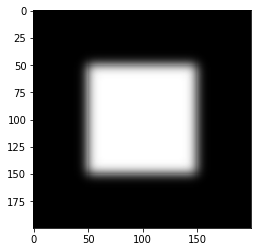

In [47]:
Grapher.show_image(blurred_img[:,:,0])
Grapher.show_plot()

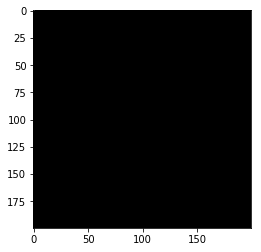

In [48]:
Grapher.show_image(transformed_img)
Grapher.show_plot()

In [50]:
np.nan_to_num(1)

array(1)